In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data/SANDIEGO.csv")

#see first few rows
df.head()


,observation_date,SAND706URN
0,1990-01-01,4.0
1,1990-02-01,3.8
2,1990-03-01,3.7
3,1990-04-01,3.9
4,1990-05-01,4.1


In [12]:

#see info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               424 non-null    datetime64[ns]
 1   unemployment_rate  424 non-null    float64       
 2   year               424 non-null    int32         
 3   month              424 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 10.1 KB


In [13]:
#describe basic stats
df.describe()


,date,unemployment_rate,year,month
count,424,424.000000,424.000000,424.000000
mean,2007-08-16 16:58:52.075471616,5.698113,2007.169811,6.462264
min,1990-01-01 00:00:00,2.600000,1990.000000,1.000000
25%,1998-10-24 06:00:00,4.000000,1998.000000,3.000000
50%,2007-08-16 12:00:00,5.000000,2007.000000,6.000000
75%,2016-06-08 12:00:00,6.900000,2016.000000,9.000000
max,2025-04-01 00:00:00,15.800000,2025.000000,12.000000
std,NaN,2.298688,10.213301,3.463213


In [14]:
#rename date and unemployment rate
df.rename(columns={"observation_date": "date", "SAND706URN": "unemployment_rate"}, inplace=True)

#turn date to datetime
df["date"] = pd.to_datetime(df["date"])

# Check for missing values
print(df.isnull().sum())

date                 0
unemployment_rate    0
year                 0
month                0
dtype: int64


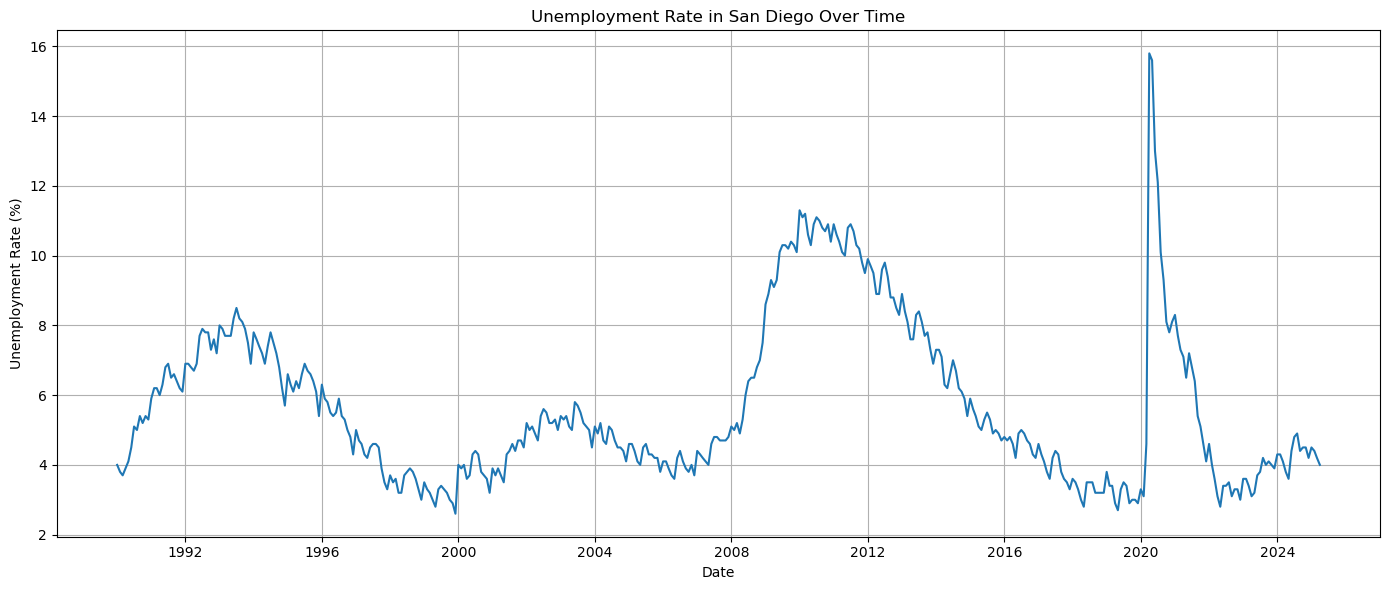

In [15]:
plt.figure(figsize = (14, 6))
sns.lineplot(x = "date", y = "unemployment_rate", data = df)
plt.title("Unemployment Rate in San Diego Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

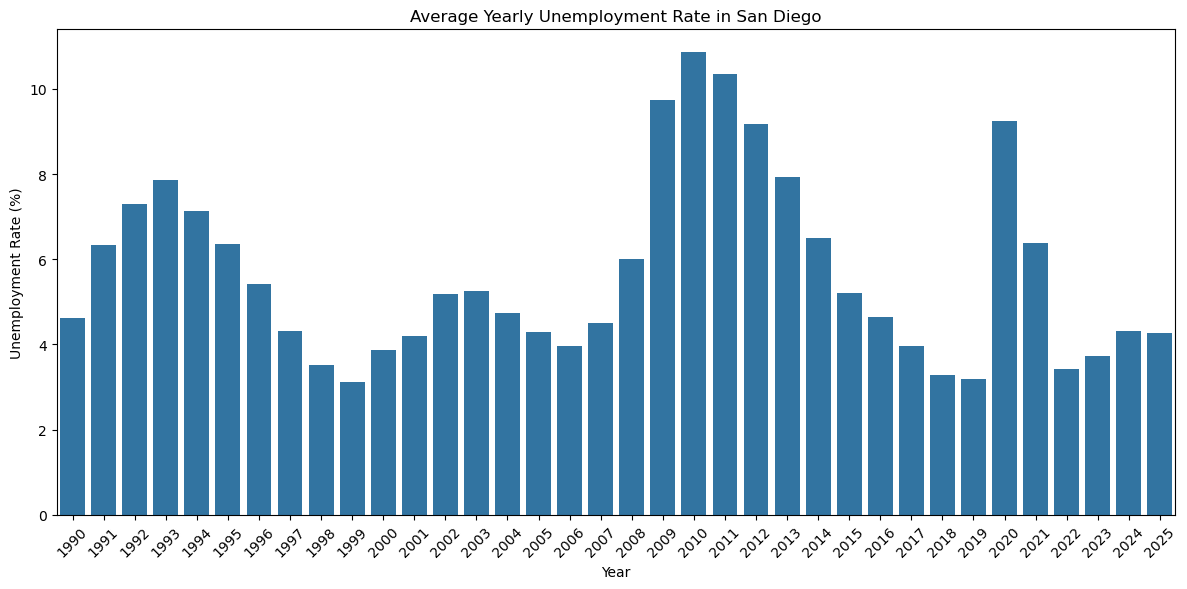

In [17]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

yearlyAvg = df.groupby("year")["unemployment_rate"].mean()

plt.figure(figsize = (12, 6))
sns.barplot(x = yearlyAvg.index, y=yearlyAvg.values)
plt.xticks(rotation = 45)
plt.title("Average Yearly Unemployment Rate in San Diego")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

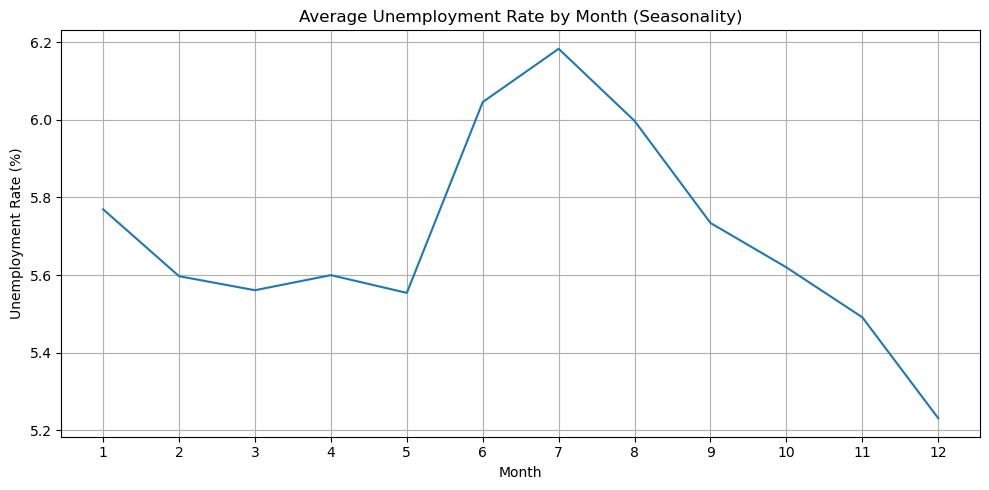

In [18]:
monthlyAvg = df.groupby("month")["unemployment_rate"].mean()

plt.figure(figsize = (10, 5))
sns.lineplot(x = monthlyAvg.index, y = monthlyAvg.values)
plt.xticks(range(1, 13))
plt.title("Average Unemployment Rate by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
